Introduction: My mission will focus on analyzing Pittsburgh's traffic. What I'm trying to do is work on identifying the neighborhoods with the lowest traffic volume based on the city of Pittsburgh's transportation statistics data set, and the neighborhoods with the lowest overall scores will be considered the neighborhoods with the most best traffic volume.
  
The dataset can be found here:  https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh

The Best Neighborhood:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

pd.options.display.max_columns = None #This will make easier to read the data, because this line of code allows me to see every single column

traffic_data = pd.read_csv("pittsburgh_traffic.csv")
traffic_data.head()

,_id,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,max_speed,median_speed,percent_over_limit,speed85_percent,speed95_percent,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,NaN,29.0,77.0,34.0,37.0,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,2,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,NaN,NaN,NaN,NaN,NaN,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,3,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,63.0,33.0,28.0,38.0,41.0,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,4,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,5,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


Use the head function to view data samples. We can see that there are a lot of NaN values here, and I have to take them into account when manipulating the data to avoid information errors.

In [3]:
# Filter the DataFrame to include rows where both 'speed95_percent' and 'speed_limit' columns are not null
filtered_speed_df = traffic_data.dropna(subset=['speed95_percent', 'speed_limit'])

filtered_speed_df

,_id,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,max_speed,median_speed,percent_over_limit,speed85_percent,speed95_percent,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,NaN,29.0,77.0,34.0,37.0,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
2,3,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,63.0,33.0,28.0,38.0,41.0,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,4,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
5,6,1041392556,76,5.713472e+08,2019-03-22,2019-03-29,1046.0,NaN,2,StatTrak,25.0,NaN,19.0,2.0,21.0,23.0,-80.014234,40.458106,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
7,8,1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,25.0,NaN,26.0,58.0,31.0,34.0,-79.964592,40.457119,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,1366,257117947,426,1.291196e+08,2021-06-15,2021-06-23,NaN,NaN,5,StatTrak,15.0,62.0,21.0,13.0,25.0,28.0,-79.895583,40.453386,Homewood South,9.0,13.0,42003130300,2.0,13.0,5.0,3-17
408,1367,464876196,427,3.257468e+08,2021-06-15,2021-06-23,NaN,NaN,4,StatTrak,15.0,57.0,21.0,17.0,26.0,29.0,-79.894000,40.452876,Homewood South,9.0,13.0,42003130300,2.0,13.0,5.0,3-17
410,1388,1140544457,429,1.023986e+09,2021-07-09,2021-07-19,910.0,NaN,2,StatTrak,25.0,51.0,23.0,29.0,28.0,30.0,-79.940428,40.461034,Bloomfield,7.0,8.0,42003080600,2.0,8.0,5.0,3-23
411,1389,742131013,430,1.933385e+09,2021-07-09,2021-07-19,271.0,NaN,3,StatTrak,25.0,39.0,20.0,10.0,25.0,27.0,-79.953005,40.465173,Bloomfield,7.0,9.0,42003090300,2.0,9.0,5.0,3-6


The current data sample is the result of deleting the empty data in speed95_percent and speed_limit.

In [4]:
# Filter the DataFrame to include rows where 'average_daily_car_traffic' is not null
filtered_traffic_df = traffic_data.dropna(subset=['average_daily_car_traffic'])

filtered_traffic_df

,_id,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,max_speed,median_speed,percent_over_limit,speed85_percent,speed95_percent,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,NaN,29.0,77.0,34.0,37.0,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
3,4,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
5,6,1041392556,76,5.713472e+08,2019-03-22,2019-03-29,1046.0,NaN,2,StatTrak,25.0,NaN,19.0,2.0,21.0,23.0,-80.014234,40.458106,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
7,8,1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,25.0,NaN,26.0,58.0,31.0,34.0,-79.964592,40.457119,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
10,11,1102260248,8,1.088318e+09,2018-07-16,2018-08-01,5592.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.911925,40.435620,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1361,5216219,421,1.382452e+09,2021-06-29,2021-07-07,5605.0,NaN,7,StatTrak,25.0,75.0,29.0,77.0,33.0,36.0,-79.926715,40.425958,Greenfield,5.0,15.0,42003151700,3.0,15.0,4.0,2-15
404,1363,1671608614,423,1.290716e+09,2021-06-15,2021-06-23,809.0,NaN,1,StatTrak,25.0,38.0,17.0,2.0,21.0,23.0,-80.010193,40.457801,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
410,1388,1140544457,429,1.023986e+09,2021-07-09,2021-07-19,910.0,NaN,2,StatTrak,25.0,51.0,23.0,29.0,28.0,30.0,-79.940428,40.461034,Bloomfield,7.0,8.0,42003080600,2.0,8.0,5.0,3-23
411,1389,742131013,430,1.933385e+09,2021-07-09,2021-07-19,271.0,NaN,3,StatTrak,25.0,39.0,20.0,10.0,25.0,27.0,-79.953005,40.465173,Bloomfield,7.0,9.0,42003090300,2.0,9.0,5.0,3-6


Now we deleted the empty data in average_daily_car_traffic

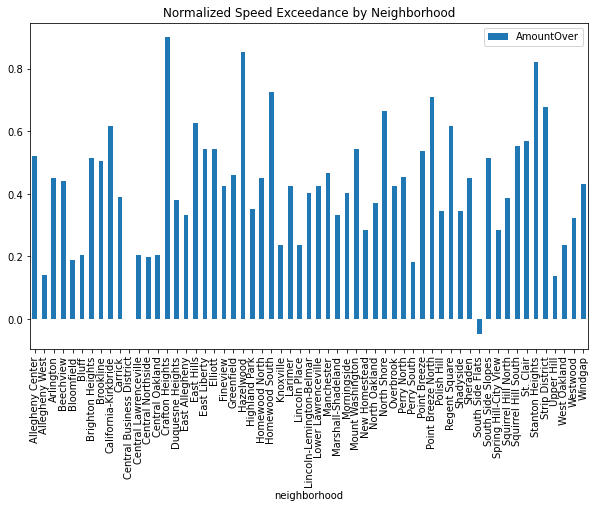

In [7]:
# Calculate the proportion by which the 95th percentile speed exceeds the speed limit
traffic_data["AmountOver"] = (traffic_data["speed95_percent"] - traffic_data["speed_limit"]) / traffic_data["speed_limit"]

# Filter the DataFrame to include only rows with non-null 'AmountOver' values and select relevant columns
SpeedDf2 = traffic_data.loc[traffic_data["AmountOver"].notnull(), ['neighborhood', 'AmountOver']].copy()

# Group by neighborhood and calculate the mean 'AmountOver' for each neighborhood
finalSpeedDf = SpeedDf2.groupby('neighborhood').mean()

# Find the maximum value across all neighborhoods to use for normalization
max_value = finalSpeedDf.max()

# Normalize the data by dividing by the maximum value and scale to 90% to adjust for visibility in the plot
compiledSpeedDf = finalSpeedDf / max_value * 0.9
compiledSpeedDf.plot.bar(rot=90, figsize=(10, 6), title="Normalized Speed Exceedance by Neighborhood")

,AmountOver
neighborhood,
Allegheny Center,0.521053
Allegheny West,0.142105
Arlington,0.450000
Beechview,0.442105
Bloomfield,0.187444
Bluff,0.205263
Brighton Heights,0.513158
Brookline,0.505263
California-Kirkbride,0.615789


I created a new column to calculate the percentage by which cars exceed the speed limit, using the formula: (speed at the 95th percentile - speed limit) / speed limit. This formula gives us the proportion by which the observed speed surpasses the designated speed limit, represented as a percentage.

Next, I transferred this newly calculated value and the corresponding neighborhood information into a new dataset. This step helped me focus solely on the data needed for further analysis.

In this new dataset, I grouped the entries by neighborhood. For each neighborhood, I calculated the average of the exceedance percentages to understand the typical speed behavior in each area.

After finding the average exceedance percentage for each neighborhood, I identified the highest average exceedance value across all neighborhoods. Using this maximum value, I normalized the average exceedance percentages for each neighborhood. This normalization process scales all the values to a range between 0 and 1, making it easier to compare the speed behavior across different neighborhoods.

Finally, I applied an arbitrary weight of 0.9 to the normalized data. This step adjusts the final values according to the significance we want to assign to the speed limit exceedance factor in our overall analysis.

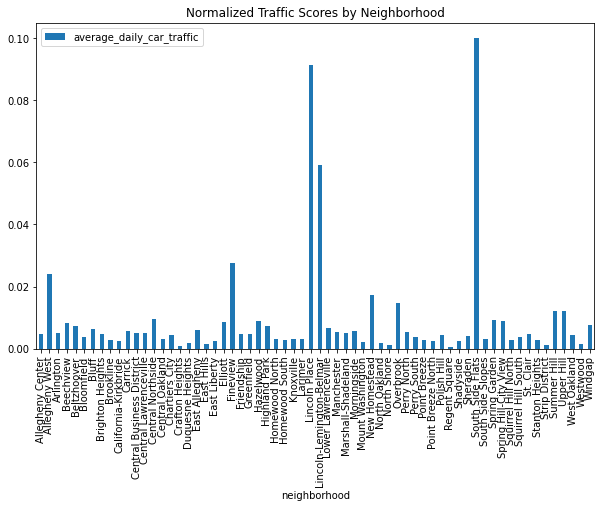

In [10]:
# First, create a new DataFrame focusing only on the 'neighborhood' and 'average_daily_car_traffic' columns.
TrafficDf2 = filtered_traffic_df[['neighborhood', 'average_daily_car_traffic']].copy()
TrafficDf2

# Group the data by 'neighborhood' and calculate the mean 'average_daily_car_traffic' for each neighborhood.
finalTrafficDf = TrafficDf2.groupby('neighborhood').mean()

# To prioritize lower traffic, invert the 'average_daily_car_traffic' values by taking their reciprocal.
finalTrafficDf["average_daily_car_traffic"] = 1 / finalTrafficDf["average_daily_car_traffic"]

# Identify the maximum value in the modified 'average_daily_car_traffic' to normalize the data.
max_value = finalTrafficDf.max()
max_value
# Normalize the traffic data by dividing by the maximum value and scaling it down with a factor of 0.1.
compiledTrafficDf = finalTrafficDf / max_value * 0.1

# Find the neighborhood(s) with the maximum normalized traffic score, indicating the lowest traffic.
compiledTrafficDf[compiledTrafficDf.average_daily_car_traffic == compiledTrafficDf.average_daily_car_traffic.max()]
compiledTrafficDf.plot.bar(figsize=(10, 6), title="Normalized Traffic Scores by Neighborhood", rot=90)


First, I organized all the neighborhoods in our dataset and calculated the average number of cars that pass through each neighborhood every day. This step helps us understand which neighborhoods have more or less traffic on average.

Because we're interested in finding places with less traffic (believing that less traffic means a better neighborhood for our criteria), I flipped the numbers. Instead of looking at how many cars there are, we look at how small the number can be - kind of like scoring lower in a game to win.

Next, I made all these flipped numbers easier to compare by scaling them down to a range between 0 and 1. This is done by taking the largest number we have after flipping and using it to scale down all the others. This way, the biggest number becomes 1, and everything else is a fraction of that.

Lastly, I applied a special factor of 0.1 to these numbers. Think of it as adjusting the volume on your music player; this factor doesn't change the song, just how loud it is. Here, it adjusts how much the traffic (or lack of it) should influence our decision on the best neighborhood, without changing the traffic patterns we observed.

So, by the end, we have a clear picture of which neighborhoods have less traffic, with all the heavy traffic areas turned down low, like background noise. This helps us pick out the quiet spots more easily.

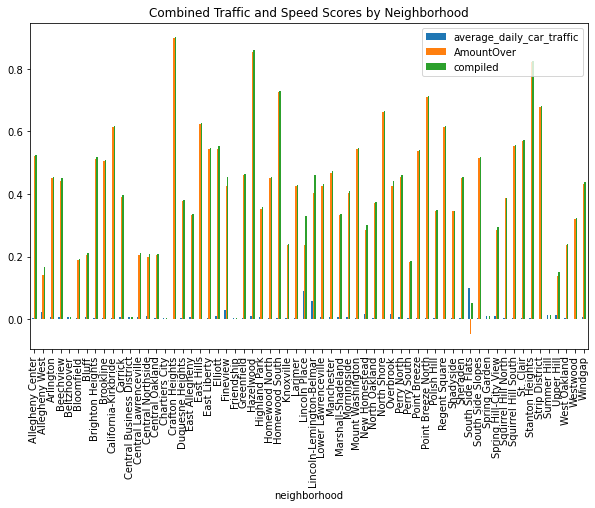

In [12]:
combined_df = pd.concat([compiledTrafficDf, compiledSpeedDf])
grouped_df = combined_df.groupby('neighborhood').sum()
grouped_df["compiled"] = np.add(grouped_df["average_daily_car_traffic"], grouped_df["AmountOver"])
grouped_df.compiled.sort_values()
grouped_df.plot.bar(figsize=(10, 6), title='Combined Traffic and Speed Scores by Neighborhood', rot=90)

I put all the data into one big group, then organized it by each neighborhood. Since there were no overlapping values, using the sum() function didn't change anything. Next, I combined all the important information into a new column named 'compiled.' After that, I arranged everything in order to draw my final conclusions.

Conclusion:

After analyzing the traffic count data for Pittsburgh, it turns out that Crafton Heights has the best (or lowest) traffic count among all neighborhoods. Personally, I don't have a favorite neighborhood in Pittsburgh since I haven’t explored much beyond Oakland. However, judging from the traffic, if Oakland were ranked as the best based on traffic counts, that would definitely raise some eyebrows, considering its usually busy nature.

Summary:
So, Our team's mission is to use data to identify Pittsburgh's top neighborhoods.
After extensive discussions, our group decided to select these three key points:
pittsburgh's parks, pittsburgh's pools, and pittsburgh's traffic, to comprehensively evaluate the community.

Base on the data we have collect with, we can have a conclusion that if you want to live in the neighborhood that has the best park, you can choose beechview. Else if you want the best swim pool, I would recommend Highland Park. Or if you just want the best traffic in pittsburgh, Crafton Heights would be the best
